# Lab 8 and 9
**Creator:** Lauren Enriquez <br>
**Date:** November 6, 2019

---
## Lab 8

**Command line:**
```
spades.py -1 /data/Lab8_data/illumina_reads_R1.fastq -2 /data/Lab8_data/illumina_reads_R2.fastq --pacbio /data/Lab8_data/pacbio_reads.fastq  -o ~/BioE131-231/Labs_8_and_9/output -t 1```

**Why do we expect short reads to produce a more fragmented assembly than long reads?**<br>
Assemblies using shorter reads need more reads to cover the whole genome, as a result there are likely to be be more gaps between the reads. Consequently, short reads lead to a more fragmented assembly (ie. more contigs) than long reads.

**Why does a single-molecule sequencing like PacBio have a higher error rate than Illumina?**<br>
Illumina uses smaller reads. As a result, Illumina can use multiple contigs for one read increasing the coverage for a read. Converseley, single-molecule sequencing (SMRT) like PacBio use longer reads. It uses a single DNA polymerase enzyme with a single molecule of DNA as a template. Single-molecule sequencing also uses a zero-mode waveguide (ZMW) to detect nucleotides which are binding to the template. However, ZMW cannot differentiate a nucleotide that has enters the well verses has left the well. Therefore, a single run of single-molecule sequencing contains many errors. To offset this error rate, PacBio use circular concensus sequencing to get multiple reads of the same template. However, Pacbio still has a higher error rate than Illumina.

**Error Code:**
```
== Error ==  system call for: "['/data/home/softwares/SPAdes-3.13.1-Linux/bin/spades-hammer', '/home/5539626/BioE131-231/Labs_8_and_9/output/corrected/configs/config.info']" finished abnormally, err code: -11
```
**Explaination as to why error occured:** <br>
The error occured due to the lack of RAM avaiable for the system to store the file information. For the remainder of the lab, the data for ***contigs.fasta*** was obtained from the Lab9_data file provided for the class in the database.

---

## Lab 9
## Generate Assembly Statistics
**Command:**
```
assembly-stats /data/Lab9_data/contigs.fasta /data/Lab9_data/scaffolds.fasta
```
```
stats for /data/Lab9_data/contigs.fasta
sum = 6680581, n = 180, ave = 37114.34, largest = 687571
N50 = 234690, n = 10
N60 = 202142, n = 13
N70 = 154232, n = 17
N80 = 103366, n = 22
N90 = 81821, n = 29
N100 = 128, n = 180
N_count = 0
Gaps = 0
-------------------------------------------------------------------------------
stats for /data/Lab9_data/scaffolds.fasta
sum = 6680345, n = 176, ave = 37956.51, largest = 687571
N50 = 234690, n = 10
N60 = 202142, n = 13
N70 = 154232, n = 17
N80 = 103366, n = 22
N90 = 83515, n = 29
N100 = 129, n = 176
N_count = 20
Gaps = 2
```

**Why is N50 is useful statistic to calculate? Why not just list the mean or median contig length? In your assembly, are scaffolds longer than contigs, or are scaffolds approximately equal to contigs?** <br>
The N50 statistic is useful in that it is a median statistic that allows for greater weighting of longer contigs. This allows one to have a clearer understanding of how many contigs are greater than the actual mean/median, instead of estimating the distribution of longer contigs in an assembly. We do not primarily use the mean contig length because there are many smaller reads in the total alignment, which would weight our mean towards smaller length contigs that are less useful. N50 tells us about the most meaningful read and overall overview of how successful our reads were in creating contigs.<br><br> In our assembly, scaffolds are approximately equal to contigs for N50-N80 values. Scaffolds had a larger N90 than contigs by 1,694 bases.

---

## Extra credit : Histogram questions

13.72480672222222


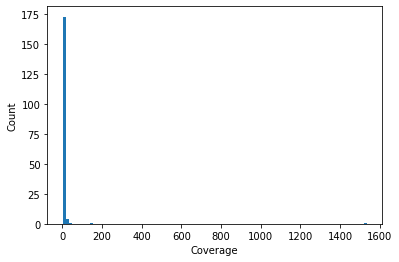

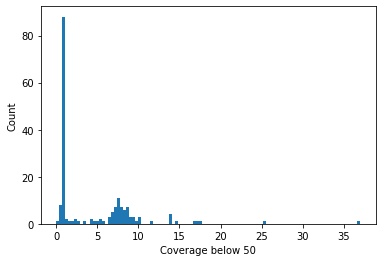

In [6]:
import matplotlib.pyplot as plt
file_io = open('/data/Lab9_data/contigs.fasta','r')
contig_list = []
for line in file_io.read().split('\n'):
    if len(line) is 0 :
        break
    if line[0] == '>':
        tmp = line[line.index('cov')+4:-1]
        contig_list.append(float(tmp))

print(sum(contig_list)/len((contig_list)))
plt.xlabel('Coverage')
plt.ylabel('Count')

p = plt.hist(contig_list,bins = 100)
plt.show()

for i in contig_list: 
    if i > 50.0:
        contig_list.remove(i)

contig_list[-1] = 0

plt.xlabel('Coverage below 50')
plt.ylabel('Count')

p = plt.hist(contig_list,bins = 100)

# display below 50
plt.show()

**Is coverage uniformly distributed? Does it look Gaussian? Is it bimodalor trimodal? What explains the presence of contigs with coverage an integer multiple of the mean coverage?** <br>
The coverage is bimodular and the reason it is an integer multiple of mean coverage is because it is likley that this contig has multiple copies of this region. Which makes sense because many bacteria have multiple copies of the same gene.

---

## Identify the taxon from which your genome originated
**Command:**
```
rna_hmm3.py -i /data/Lab9_data/contigs.fasta -o ~/BioE131-231/Labs_8_and_9/rna_search.gff -L /data/Lab9_data/HMM3
```
Manually deleted all lines within other than those containing 16S_rRNA genes. Leaving only 6 seqences, listed below. They were viewed using bedtools.<br><br>
**seq_name	method	feature	start	end	evalue	strand	frame	attribute**<br>
`NODE_22_length_103366_cov_10.083467	rna_hmm3	rRNA	35531	37075	0	+	NA	16S_rRNA
NODE_17_length_154232_cov_9.587340	rna_hmm3	rRNA	124542	126086	0	+	NA	16S_rRNA
NODE_8_length_259210_cov_9.408938	rna_hmm3	rRNA	63713	65257	0	-	NA	16S_rRNA
NODE_5_length_298800_cov_8.930188	rna_hmm3	rRNA	13929	15473	0	+	NA	16S_rRNA
NODE_3_length_378948_cov_10.013238	rna_hmm3	rRNA	348500	350044	0	+	NA	16S_rRNA
NODE_1_length_687571_cov_8.345136	rna_hmm3	rRNA	46286	47830	0	+	NA	16S_rRNA
`<br><br>
**Command:**
```
bedtools getfasta -fi /data/Lab9_data/contigs.fasta -bed ~/BioE131-231/Labs_8_and_9/rna_search.gff 
```
**Terminal:**
>NODE_22_length_103366_cov_10.083467:35530-37075
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_17_length_154232_cov_9.587340:124541-126086
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_8_length_259210_cov_9.408938:63712-65257
TCGATTAAGGAGGTGATCCAGCCGCAGGTTCCCCTACGGCTACCTTGTTACGACTTCACCCCAGTCATGAATCACACCGTGGTAACCGTCCTCCCGAAGGTTAGACTAGCTACTTCTGGTGCAACCCACTCCCATGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGACATTCTGATTCGCGATTACTAGCGATTCCGACTTCACGCAGTCGAGTTGCAGACTGCGATCCGGACTACGATCGGTTTTCTGGGATTAGCTCCACCTCGCGGCTTGGCAACCCTCTGTACCGACCATTGTAGCACGTGTGTAGCCCAGGCCGTAAGGGCCATGATGACTTGACGTCATCCCCACCTTCCTCCGGTTTGTCACCGGCAGTCTCCTTAGAGTGCCCACCATTACGTGCTGGTAACTAAGGACAAGGGTTGCGCTCGTTACGGGACTTAACCCAACATCTCACGACACGAGCTGACGACAGCCATGCAGCACCTGTCTCAATGTTCCCGAAGGCACCAATCCATCTCTGGAAAGTTCATTGGATGTCAAGGCCTGGTAAGGTTCTTCGCGTTGCTTCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCATTTGAGTTTTAACCTTGCGGCCGTACTCCCCAGGCGGTCAACTTAATGCGTTAGCTGCGCCACTAAGAGCTCAAGGCTCCCAACGGCTAGTTGACATCGTTTACGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCACCTCAGTGTCAGTATCAGTCCAGGTGGTCGCCTTCGCCACTGGTGTTCCTTCCTATATCTACGCATTTCACCGCTACACAGGAAATTCCACCACCCTCTACCATACTCTAGCTCGTCAGTTTTGAATGCAGTTCCCAGGTTGAGCCCGGGGATTTCACATCCAACTTAACGAACCACCTACGCGCGCTTTACGCCCAGTAATTCCGATTAACGCTTGCACCCTCTGTATTACCGCGGCTGCTGGCACAGAGTTAGCCGGTGCTTATTCTGTCGGTAACGTCAAAACAATTACGTATTAGGTAACTGCCCTTCCTCCCAACTTAAAGTGCTTTACAATCCGAAGACCTTCTTCACACACGCGGCATGGCTGGATCAGGCTTTCGCCCATTGTCCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGACCGTGTCTCAGTTCCAGTGTGACTGATCATCCTCTCAGACCAGTTACGGATCGTCGCCTTGGTGAGCCATTACCTCACCAACTAGCTAATCCGACCTAGGCTCATCTGATAGCGCAAGGCCCGAAGGTCCCCTGCTTTCTCCCGTAGGACGTATGCGGTATTAGCGTCCGTTTCCGAGCGTTATCCCCCACTACCAGGCAGATTCCTAGGCATTACTCACCCGTCCGCCGCTCTCAAGAGGTGCAAGCACCTCTCTACCGCTCGACTTGCATGTGTTAGGCCTGCCGCCAGCGTTCAATCTGAGCCATGATCAAACTCTTCAGTTCAAA
>NODE_5_length_298800_cov_8.930188:13928-15473
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_3_length_378948_cov_10.013238:348499-350044
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_1_length_687571_cov_8.345136:46285-47830
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA

### Ribosomal Database Project’s SeqMatch tool
#### Genus: Pseudomonas
**Link:** https://rdp.cme.msu.edu/seqmatch/seqmatch_sum.jsp?qvector=204&depth=0&currentRoot=0&num=20<br><br>
All of the sequences had similar results. The top similarity score (S_ab score) was ***Pseudomonas frederiksbrgensis*** and the most common (frequent) match was ***Pseudomonas mandelii***.
The picture below shows the seqMatch result of 1 match.
<img src="Genus-identification.png" width="700" height="500"/>

## Genome and Annotation
### RAST
**Link:** http://rast.nmpdr.org/seedviewer.cgi?page=Organism&organism=6666666.491484 <br>
<img src="RAST_info.png" width="900" height="500"/>
<img src="RAST.png" width="900" height="500"/>

### BASys
BASys was taking too long to recieve the data from. Instead, the genome was analyzed on DFAST, a bacterial genome annotation pipeline.

## DFAST
**Links:** https://dfast.nig.ac.jp/analysis/annotation/40cb5bcb-c2bf-49de-9ae4-fc7ad752faf6<br>
https://dfast.nig.ac.jp/analysis/annotation/40cb5bcb-c2bf-49de-9ae4-fc7ad752faf6/features<br>
<img src="Stats_genome.png" width="400" height="400"/>
A TSV file labeled **"features.tsv"** is provided in the **Labs_8_and_9 folder** that contains further information about the genome. It particular it has a category labeled "product" which has a predicted description of what a given conting sequence encodes for.<br>

Example entries:<br>

|number|locus|sequence|location|feature|product|
|:---:|:---:|:---:|:---:|:---:|:---:|
|8| LOCUS_00080| sequence001| complement(4043..6184)| CDS| chemotaxis transducer|
|1056| LOCUS_10420| sequence003|complement(65407..67434)| CDS| type IV secretion protein Rhs|

## Research and Write Up
The alignments most strongly matched those of the genus *Pseudomonas*, specifically the specie *frederiksbergensis* and *mandelii*. The organism is a gram-negative bacteria. The size of the genome is 6,678,084 base pairs, with a GC content of 58.7% and a total of 6,363 coding subsequences. According to the RAST genome annotation, some of the highest scoring, closest neighbors include *Pseudomonas aeruginosa* and *Pseudomonas fluorescens*. The DFAST genome annotation had a slight variation in data described before. It stated that there were 6,128 coding subsequences with 18 rRNAs and 71 tRNAs in the subsequences . The DFAST annotation also provided descriptions of the proteins that are translated from the genome.

The Pseudomonas genus reside in wet and warm conditions, such as in water, damp areas, and soil. They are a mildly infectious bacterium. Members of the *Pseudomonas* genus are generally non-infectious to healthy individuals, but they can be dangerous to those who are surrounded by wet or damp environments, have compromised immune systems, or have exposed wounds.
Additionally, some species are known to fluoresce. For example, *Pseudomonas aeruginosa* secretes a fluorescent molecule known as pyoverdin. In the genome annotated for this lab there are 5 genes that encode pyoverdin, leading to the possibility that this species may have the ability to fluoresce. 

The genome annotation of the bacterium had several drug resistance markers. The RAST annotation identified tolerance to colicin E2, streptothricin and fosfomycin resistance as well as multidrug resistance via efflux pumps. Efflux pumps serve to pump antibiotics out of the bacteria's cytosol. Chloramphenicol, penicillin and tetracycline have been shown to be susceptible to efflux pump overexpression resistance. The pumps that are responsible for this resistance in gram negative bacteria are members of the RND family. These pumps connect the inner and outer membranes. The *Pseudomonas* strain sequenced in this lab may have antibiotic resistance via efflux pump pathway. DFAST identify emrA and emrB in the genome. These are two proteins that are involved in the efflux pump pathway. The factors that allow bacterial propagation are dependent on sending out virulence determinants into the environment. It is hard to determine if this bacterium has upregulation up the genes that encode emrA and emrB.

The genome encodes several known toxins. Some of which include toxin HipA, toxin HigB-2, and antitoxin HicB. This was found in the DFAST features.tsv file. The toxin HipA inhibits the translation process by phosphoration of GltX:tRNA at its ATP binding site. It is classified as a Type II toxin-antitoxin system.

## References
1) https://www.ncbi.nlm.nih.gov/pubmed/16845433 <br>
2) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5812544/pdf/fux006.pdf![image.png](attachment:image.png)<br>

 